<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/HW10/sidpatel_hw10_digit_recognition_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
import pylab as pl
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
#runtime to GPU

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###From tensorflow docs on mnist.load_data() :
---
x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data

In [ ]:
# x_train, x_test are the pixel data: 60000 (train)images, 10000 (test)images that are 28x28 pixels each with values 0 to 255
# y_train, y_test are the labels for the 60000 (train)images, 10000 (test)images: integer labels 0 to 9

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
nimg, img_row, img_col = x_train.shape
nimgT = x_test.shape[0]
print("Training data shape:",nimg, img_row ,img_col)
print("Test data shape:",nimgT, img_row ,img_col)

Training data shape: 60000 28 28
Test data shape: 10000 28 28


In [ ]:
#normalize/scale data to [0,1]
x_train = (x_train.astype(float) / 255)
x_test = (x_test.astype(float) / 255)

In [ ]:
#reshape data to be nimg(train) or nimgT(test), total pixels = img_row * img col
x_train = x_train.reshape(nimg, img_row*img_col);
x_test = x_test.reshape(nimgT, img_row*img_col);

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#Build the model

### From keras docs on dense layer: 
---
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

In [ ]:
model_digitRecog = Sequential()

In [ ]:
model_digitRecog.add(Dense(units=10, input_dim=img_row*img_col ,activation="softmax"))
#units = output shape = 10 since we want integer value 0 to 9
#input_dim = 28*28 pixel data
# https://stats.stackexchange.com/a/410112 -> softmax makes values of probability
#                                            of all classes (0 to 9) sum to 1 
# -> linked article: https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/                                                                                      

In [ ]:
patience = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model_digitRecog.compile(loss="sparse_categorical_crossentropy", optimizer = opt,metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
# https://stackoverflow.com/a/58566065
# https://keras.io/api/metrics/accuracy_metrics/
historyRecog = model_digitRecog.fit(x_train, y_train,
                                    validation_data=(x_test, y_test),
                                    epochs=30, batch_size=100, verbose=1, callbacks=[patience])


Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.6250 - sparse_categorical_accuracy: 0.8418 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.9054
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.9058 - val_loss: 0.3087 - val_sparse_categorical_accuracy: 0.9162
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3094 - sparse_categorical_accuracy: 0.9144 - val_loss: 0.2892 - val_sparse_categorical_accuracy: 0.9196
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2921 - sparse_categorical_accuracy: 0.9188 - val_loss: 0.2797 - val_sparse_categorical_accuracy: 0.9225
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2815 - sparse_categorical_accuracy: 0.9209 - val_loss: 0.2742 - val_sparse_categorical_accuracy: 0.9241
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2744 - sparse_categorica

In [ ]:
print(model_digitRecog.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


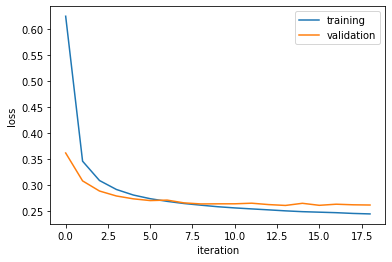

In [ ]:
pl.plot(historyRecog.history['loss'], label="training")
pl.plot(historyRecog.history['val_loss'], label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend();

So if I am interpreting this right, the optimal amount of epochs for this model is from 5 to around 8 I suppose.

In [ ]:
outputRecog = model_digitRecog.predict(x_test)

In [ ]:
outputRecog

array([[6.1907093e-07, 1.4975423e-12, 1.9071128e-06, ..., 9.9593794e-01,
        1.0251127e-05, 2.7440960e-04],
       [1.3870402e-04, 1.5601726e-06, 9.9269217e-01, ..., 1.5270640e-18,
        3.3957509e-05, 2.8114703e-15],
       [1.4614591e-06, 9.7537154e-01, 1.5647171e-02, ..., 6.2539993e-04,
        3.3710217e-03, 2.4492230e-04],
       ...,
       [7.6290991e-09, 2.4757194e-09, 4.0868645e-06, ..., 2.0381631e-03,
        7.1885143e-03, 2.3449475e-02],
       [5.3211913e-08, 6.7322638e-08, 7.6361800e-08, ..., 8.9049642e-08,
        6.5242136e-03, 6.7604944e-08],
       [2.0871778e-07, 5.0287516e-15, 3.9721992e-05, ..., 1.5673139e-13,
        1.5673715e-08, 7.4507596e-12]], dtype=float32)

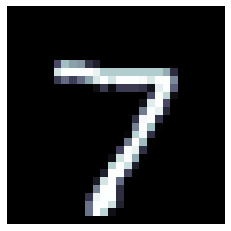

In [ ]:
pl.imshow(x_test[0].reshape((28,28)) , cmap="bone")
pl.axis('off');

In [ ]:
outputRecog[0]

array([6.1907093e-07, 1.4975423e-12, 1.9071128e-06, 3.7548451e-03,
       2.0122957e-07, 1.9798534e-05, 2.9797883e-11, 9.9593794e-01,
       1.0251127e-05, 2.7440960e-04], dtype=float32)

In [ ]:
# 10 Output nodes as defined from the dense layer, each for the integers 0 to 9
# softmax makes the sum of values (probability) of the nodes that represent integers (0 to 9) = 1
# then the index with the largest value (probability) is the node that represents the best predicted value
# np.argmax()

In [ ]:
np.argmax(outputRecog[0])

7

In [ ]:
# for first image, 7 is correctly predicted

In [ ]:
def checkPrediction(i, testdata, predict, initialshape=(28,28)):
    
    for i in range(i):
        fig = pl.figure(figsize=(2,2)) 
        ax = fig.add_subplot(111)
        ax.imshow(testdata[i].reshape(initialshape) , cmap="bone")
        pl.title("Prediction: "+str(np.argmax(predict[i])));
        ax.axis('off') #https://stackoverflow.com/a/25864515
        

In [ ]:
def checkNprediction(n, testdata, predict, initialshape=(28,28)):
    pl.imshow(testdata[n].reshape(initialshape) , cmap="bone")
    pl.title("Prediction: "+str(np.argmax(predict[n])));
    pl.axis('off') #https://stackoverflow.com/a/25864515

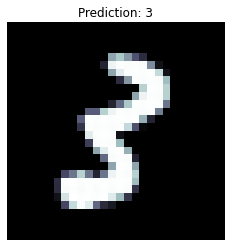

In [ ]:
checkNprediction(2305, x_test, outputRecog)

Image is of image 2305.Title has the index for the node with the highest probabilities of nodes 0 to 9, in this case 3 for this image. 

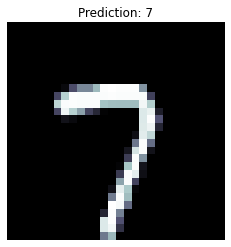

In [ ]:
checkNprediction(2332, x_test, outputRecog)

Image is of image 2332.Title has the index for the node with the highest probabilities of nodes 0 to 9, in this case 7 for this image. 

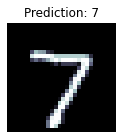

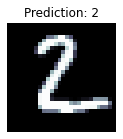

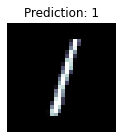

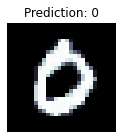

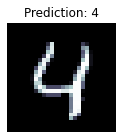

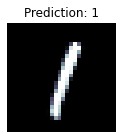

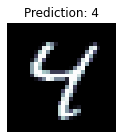

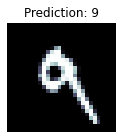

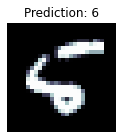

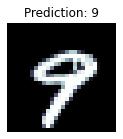

In [ ]:
checkPrediction(10, x_test, outputRecog)

More images of numbers and their predictions in the title.

---

<h1 style="color:red"> Great !</h1>
